# Confident TGAS+RAVE data

## Select stars that have relatively small distance errors ~ max 20%

In [63]:
import vaex
import csv
import pandas as pd
from numpy import *
import pylab as p
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})

In [65]:
fn = "/net/gaia/data/users/breddels/data/tgas/x_rave/tgas_x_rave_more_extra.hdf5"
ds = vaex.open(fn)

In [17]:
dt = vaex.open('/net/gaia/data/users/breddels/data/tgas/x_allwise_2mass_tycho2/tgas_x_allwise_2mass_tycho2_extra.hdf5')

In [ ]:
ds.add_virtual_columns_lbrvr_proper_motion2vcartesian(distance='best_distance', vr='HRV', vx='vx_coba', vy='vy_coba', vz='vz_coba')

In [ ]:
ds.evaluate('vx_coba')[0]

In [ ]:
vr = ds.data.HRV[0]
l  = deg2rad(ds.data.l[0])
b  = deg2rad(ds.data.b[0])
vl = ds.data.pm_l[0]*(ds.data.best_distance[0])*4.74057
vb = ds.data.pm_b[0]*(ds.data.best_distance[0])*4.74057

vx_coba = vr*cos(l)*cos(b) - vl*sin(l) - vb*cos(l)*sin(b)
vx_coba

In [ ]:
ds.evaluate('x')[0]

In [ ]:
d = ds.data.best_distance[0]
x_coba = d*cos(b)*cos(l)

In [ ]:
len(ds)

In [ ]:
ds.selected_length(selection='ALGO_CONV == 1')

In [20]:
disterrormax = 0.20
hrverrormax  = 8
mincorrcoeff = 10
minSNR       = 20

ds.select('((best_parallax_from == b"rave")\
    & (best_distance_uncertainty / best_distance < %f)\
    & (best_distance > 0)\
    & (eHRV < %f) & (CorrelationCoeff > %f)\
    & (SNR_K > %f) & (ALGO_CONV != 1))|\
    ((best_parallax_from == b"tgas")\
    & (best_distance_uncertainty / best_distance < %f)\
    & (best_distance > 0)\
    & (eHRV < %f) & (CorrelationCoeff > %f))'\
    %(disterrormax, hrverrormax, mincorrcoeff, minSNR, disterrormax, hrverrormax, mincorrcoeff), name='subset')

In [ ]:
ds.selected_length(selection='subset_jorrit'), ds.selected_length(selection='subset')

In [ ]:
arange(len(ds))

In [ ]:
ds.add_column('rockstar_id', arange(len(ds)))

In [ ]:
U = ds.evaluate('vx')+11.1
V = ds.evaluate('vy')+12.24
W = ds.evaluate('vz')+7.25

ds.add_column('U', f_or_array=U)
ds.add_column('V', f_or_array=V)
ds.add_column('W', f_or_array=W)

In [ ]:
ds.export_hdf5('/net/virgo01/data/users/virgini/rockstar/RC3/data/data_6d_cut_corrected.hdf5', selection='subset')

In [64]:
ds2 = vaex.open('/net/virgo01/data/users/virgini/rockstar/RC3/data/data_6d_cut_corrected.hdf5')

In [ ]:
ds2.data.rockstar_id

# Plot before and after selection

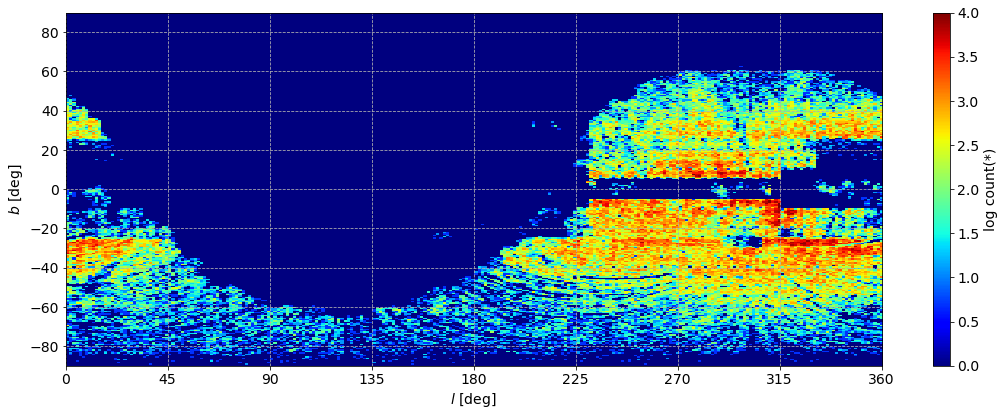

In [62]:
fig=p.figure(figsize=(14,6))
p.grid(ls='dashed')
ds.plot('l', 'b', f='log', limits=[[0,360],[-90,90]], what='count(*)', colormap='jet', vmin=0, vmax=4)
p.xlabel(r'$l$ [deg]'), p.ylabel(r'$b$ [deg]')
p.xticks(arange(0,360+45,45))
fig.tight_layout(rect=[0,0,1.1,1])
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Report/sky-before.png', format='png')
p.show()

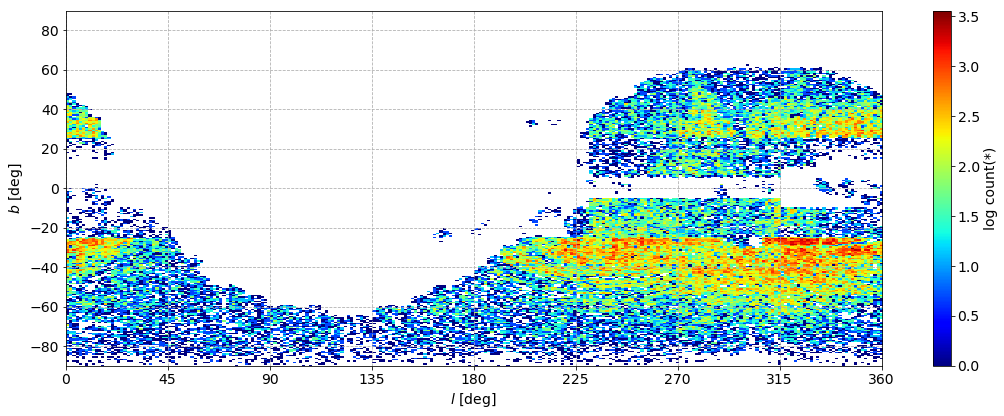

In [69]:
fig=p.figure(figsize=(14,6))
p.grid(ls='dashed')
ds2.plot('l', 'b', f='log', limits=[[0,360],[-90,90]], what='count(*)', colormap='jet')
p.xlabel(r'$l$ [deg]'), p.ylabel(r'$b$ [deg]')
p.xticks(arange(0,360+45,45))
fig.tight_layout(rect=[0,0,1.1,1])
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Report/sky-after-white.png', format='png')
p.show()

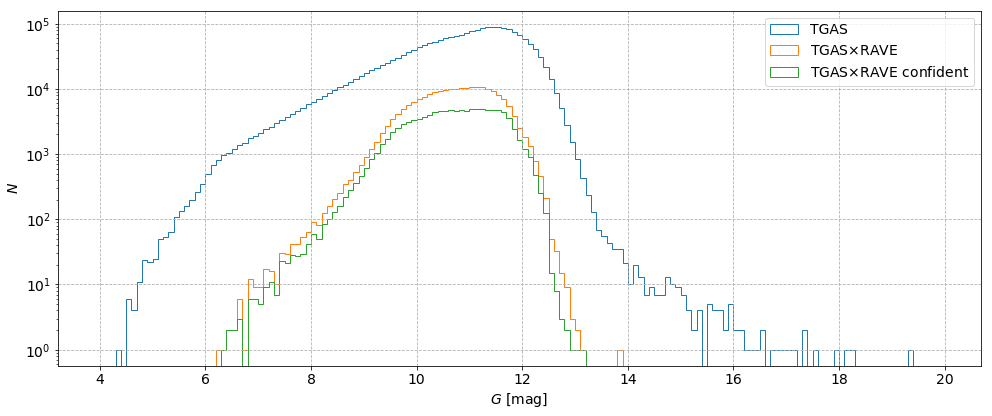

In [39]:
fig=p.figure(figsize=(14,6))
data = ds.evaluate('phot_g_mean_mag')
data2 = ds.evaluate('phot_g_mean_mag', selection='subset')
data3 = dt.evaluate('phot_g_mean_mag')
p.grid(ls='dashed')
bins=arange(4,20,0.1)
p.hist(data3, bins=bins, histtype='step', label='TGAS')
p.hist(data, bins=bins, histtype='step', label=r'TGAS$\times$RAVE')
p.hist(data2, bins=bins, histtype='step', label=r'TGAS$\times$RAVE confident')
p.yscale('log')
p.xlabel(r'$G$ [mag]'), p.ylabel(r'$N$')
p.legend()
fig.tight_layout()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Report/magnitude-comparison.png', format='png')
p.show()

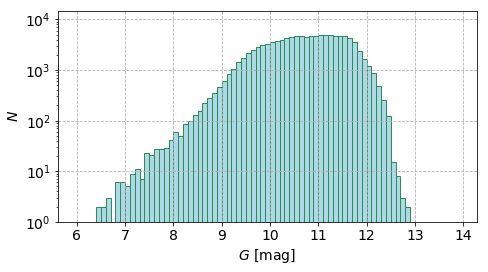

In [11]:
fig=p.figure(figsize=(7,4))
data = ds.evaluate('phot_g_mean_mag', selection='subset')
p.grid(ls='dashed')
p.hist(data, bins=arange(6,14,0.1), histtype='bar', edgecolor='seagreen', color='lightblue')
p.yscale('log')
p.ylim(0,15000)
p.xlabel(r'$G$ [mag]'), p.ylabel(r'$N$')
fig.tight_layout()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/Report/magnitude-before.png', format='png')
p.show()

## Change data into csv for running rockstar

In [ ]:
input_rockstar = ['x', 'y', 'z', 'U', 'V', 'W', 'rockstar_id']
df = ds.to_pandas_df(column_names=input_rockstar, selection='subset', strings=True)

In [ ]:
# put the columns in order we want
df = df[['x', 'y', 'z', 'U', 'V', 'W', 'rockstar_id']]

In [ ]:
df.to_csv('/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_5_corrected', sep=' ', index=False)

In [ ]:
# to print for thesis
input_rockstar = ['x', 'y', 'z', 'U', 'V', 'W', 'rockstar_id']
df = pd.read_csv('/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_5_corrected', sep=' ', comment='#')

# Examine the old data

In [ ]:
fn = "/net/gaia/data/users/breddels/data/tgas/x_rave/tgas_x_rave_more_extra.hdf5"
ds_test = vaex.open(fn)

In [ ]:
ds_test.get_column_names(hidden=True, strings=True)

In [ ]:
df_test = ds_test.to_pandas_df(column_names=None, selection=None, strings=True)

In [ ]:
arr1 = df_test.best_distance[0:5]
arr2 = 1/ df_test.best_parallax[0:5]
in1d(arr1, arr2)

In [ ]:
df_test.best_parallax_error[0:5]/df_test.best_distance_uncertainty[0:5]

In [ ]:
df.shape

In [ ]:
min_parallax = df_test[df_test.best_parallax == df_test.best_parallax.min()]

In [ ]:
min_parallax.parallax_error

In [ ]:
min_parallax.best_parallax

# Confident TGAS data

In [ ]:
dt = vaex.open('/net/gaia/data/users/breddels/data/tgas/x_allwise_2mass_tycho2/tgas_x_allwise_2mass_tycho2_extra.hdf5') #data tgas

In [ ]:
disterrormax = 0.20
dt.select('(distance_uncertainty / distance < %f) & (distance > 0)' %disterrormax, name='subset')

In [ ]:
dt.export_hdf5('/net/virgo01/data/users/virgini/rockstar/RC3/data/data_tgas_cut.hdf5', selection='subset')

In [ ]:
vaex.open('/net/virgo01/data/users/virgini/rockstar/RC3/data/data_tgas_cut.hdf5')

In [ ]:
vaex.from_ascii('/net/virgo01/data/users/virgini/rockstar/RC3/data/data_5d')

# Data Correction

## 1. Solar motion and position

In [ ]:
# Solar peculiar velocity: # Values are taken from Schonrich et al (2010)

vx_sun = 11.1
vy_sun = 12.24
vz_sun = 7.25

# Velocity of Local Standards of Rest

vy_cir = 220

# Solar position from the Galactic Center

R0 = -8

## 2. Translation in cartesian coordinate

In [ ]:
# The Tgas-Rave data is provided in heliocentric velocities. We want to convert this into galactocentric ones.

tmp_input_gal = '/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_4_gal'
with open(tmp_input_gal, 'w') as input_gal:
    wr = csv.writer(input_gal, delimiter=' ', lineterminator='\n')
    wr.writerow(['#x', 'y', 'z', 'vx', 'vy', 'vz', 'source_id'])
    for i in range(len(df)):
        vx_gal = df.vx[i] + vx_sun
        vy_gal = df.vy[i] + vy_sun + vy_cir
        vz_gal = df.vz[i] + vz_sun
        x_gal = df.x[i] + R0
        y_gal = df.y[i]
        z_gal = df.z[i]
        wr.writerow([x_gal, y_gal, z_gal, vx_gal, vy_gal, vz_gal, df.source_id[i]])

In [ ]:
# This is correction only for sun's peculiar motion

tmp_input_pec = '/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_4_pec'
with open(tmp_input_pec, 'w') as input_pec:
    wr = csv.writer(input_pec, delimiter=' ', lineterminator='\n')
    wr.writerow(['#x', 'y', 'z', 'vx', 'vy', 'vz', 'source_id'])
    for i in range(len(df)):
        vx_corr = df.vx[i]-vx_pec
        vy_corr = df.vy[i]-vy_pec
        vz_corr = df.vz[i]-vz_pec
        wr.writerow([df.x[i], df.y[i], df.z[i], vx_corr, vy_corr, vz_corr, df.source_id[i]])